# First Step

#### Put daily_revenue.csv file to the same directory of this file and run all code until the second step

In [20]:
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt
from datetime import datetime

import statsmodels
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

In [21]:
daily_revenue=pd.read_csv("daily_revenue.csv")

In [22]:
sitelist=daily_revenue["site"].unique()

d1 = date(2016, 7, 13)  # start date
d2 = date(2017, 5, 31)  # end date
delta = d2 - d1         # timedelta
datelist=[(d1+timedelta(i)).strftime('%Y-%m-%d') for i in range(delta.days + 1)]

#fulldate=pd.DataFrame({"date":datelist,"site":sitelist})

In [23]:
df1=pd.DataFrame({"date":datelist,"key":1})
df2=pd.DataFrame({"key":1,"site":sitelist})
fulldatedf=df1.merge(df2,on="key")

dr=fulldatedf[["date","site"]].merge(daily_revenue,on=["date","site"],how="left")#.fillna({"revenue":0,pageviews:0})
dr["CPM"]=dr["revenue"]/(dr["pageviews"]/1000)
dr["date"]=[datetime.strptime(i, '%Y-%m-%d') for i in dr["date"]]
dr=dr.fillna(0)

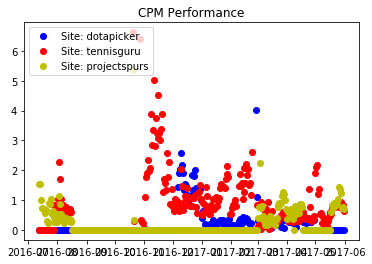

In [24]:
plot_wwside=dr[dr["site"]=="dotapicker"][["date","CPM"]]
plt.plot(plot_wwside["date"],plot_wwside["CPM"],'bo',label="Site: dotapicker")

plot_wwside=dr[dr["site"]=="tennisguru"][["date","CPM"]]
plt.plot(plot_wwside["date"],plot_wwside["CPM"],'ro',label="Site: tennisguru")

plot_wwside=dr[dr["site"]=="projectspurs"][["date","CPM"]]
plt.plot(plot_wwside["date"],plot_wwside["CPM"],'yo',label="Site: projectspurs")
plt.legend(loc='upper left')
plt.title("CPM Performance")
plt.show()

In [27]:
def Naive_model(test,train):
    dd= np.asarray(train.CPM)
    y_hat = test.copy()
    y_hat['naive'] = dd[len(dd)-1]
#     plt.figure(figsize=(12,8))
#     plt.plot(train.index, train['CPM'], label='Train')
#     plt.plot(test.index,test['CPM'], label='Test')
#     plt.plot(test.index,y_hat['naive'], label='Naive Forecast')
#     plt.legend(loc='best')
#     plt.title("Naive Forecast")
#     plt.show()

    rms = sqrt(mean_squared_error(test.CPM, y_hat.naive))
    print("RMSE of Naive Model: ",rms)

    return rms
    
    
def Naive_model_predict(test,train,CPM):
    dd= np.asarray(train.CPM)
    y_hat = test.copy()
    y_hat['naive'] = dd[len(dd)-1]
    
    predict_value=y_hat.naive.tolist()[0]
    
    if (CPM>=0.5*predict_value)&(CPM<=1.5*predict_value):
        return "Prediction is "+str(predict_value)+", real data is "+str(CPM)+", normal"
    else:
        return "Prediction is "+str(predict_value)+", real data is "+str(CPM)+", ABNORMAL"
    

In [28]:
def MA_model(test,train):
    y_hat_avg = test.copy()
    y_hat_avg['moving_avg_forecast'] = train['CPM'].rolling(10).mean().iloc[-1]
#     plt.figure(figsize=(16,8))
#     plt.plot(train['CPM'], label='Train')
#     plt.plot(test['CPM'], label='Test')
#     plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
#     plt.legend(loc='best')
#     plt.show()

    rms = sqrt(mean_squared_error(test.CPM, y_hat_avg.moving_avg_forecast))
    print("RMSE of MA Model: ",rms)
    
    return rms

def MA_model_predict(test,train,CPM):
    y_hat_avg = test.copy()
    y_hat_avg['moving_avg_forecast'] = train['CPM'].rolling(10).mean().iloc[-1]
    
    predict_value=y_hat_avg.moving_avg_forecast.tolist()[0]
    
    if (CPM>=0.5*predict_value)&(CPM<=1.5*predict_value):
        return "Prediction is "+str(predict_value)+", real data is "+str(CPM)+", normal"
    else:
        return "Prediction is "+str(predict_value)+", real data is "+str(CPM)+", ABNORMAL"
    

In [29]:
def Holt_Winters_model(test,train):
    y_hat_avg = test.copy()
    fit1 = statsmodels.tsa.holtwinters.ExponentialSmoothing(np.asarray(train['CPM']) ,seasonal_periods=7 ,trend='add', seasonal='add').fit()
    y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
#     plt.figure(figsize=(16,8))
#     plt.plot( train['CPM'], label='Train')
#     plt.plot(test['CPM'], label='Test')
#     plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
#     plt.legend(loc='best')
#     plt.show()

    rms = sqrt(mean_squared_error(test.CPM, y_hat_avg.Holt_Winter))
    print("RMSE of Holt-Winters Model: ",rms)
    
    return rms

def Holt_Winters_model_predict(test,train,CPM):
    y_hat_avg = test.copy()
    fit1 = statsmodels.tsa.holtwinters.ExponentialSmoothing(np.asarray(train['CPM']) ,seasonal_periods=7 ,trend='add', seasonal='add').fit()
    y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
    
    predict_value=y_hat_avg.Holt_Winter.tolist()[0]
    
    if (CPM>=0.5*predict_value)&(CPM<=1.5*predict_value):
        return "Prediction is "+str(predict_value)+", real data is "+str(CPM)+", normal"
    else:
        return "Prediction is "+str(predict_value)+", real data is "+str(CPM)+", ABNORMAL"
    

In [30]:
def Arima_model(test,train):
    y_hat_avg = test.copy()
    fit1 = sm.tsa.statespace.SARIMAX(train.CPM, order=(0, 0, 0),seasonal_order=(0,2,1,7),enforce_invertibility=False).fit()
    y_hat_avg['SARIMA'] = fit1.predict(start="2017-4-1", end="2017-5-31", dynamic=True)
#     plt.figure(figsize=(16,8))
#     plt.plot( train['CPM'], label='Train')
#     plt.plot(test['CPM'], label='Test')
#     plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
#     plt.legend(loc='best')
#     plt.show()

    rms = sqrt(mean_squared_error(test.CPM, y_hat_avg.SARIMA))
    print("RMSE of Arima Model: ",rms)

    return rms

def Arima_model_predict(test,train,CPM):
    y_hat_avg = test.copy()
    fit1 = sm.tsa.statespace.SARIMAX(train.CPM, order=(0, 0, 0),seasonal_order=(0,2,1,7),enforce_invertibility=False).fit()
    predict_date=test["date"][0].strftime("%Y-%m-%d")
    y_hat_avg['SARIMA'] = fit1.predict(start=predict_date, end=predict_date, dynamic=True)
    
    predict_value=y_hat_avg.SARIMA.tolist()[0]
    
    if (CPM>=0.5*predict_value)&(CPM<=1.5*predict_value):
        return "Prediction is "+str(predict_value)+", real data is "+str(CPM)+", normal"
    else:
        return "Prediction is "+str(predict_value)+", real data is "+str(CPM)+", ABNORMAL"
    

In [31]:
def SES_model(test,train):

    y_hat_avg = test.copy()
    fit2 = SimpleExpSmoothing(np.asarray(train['CPM'])).fit(smoothing_level=1,optimized=False)
    y_hat_avg['SES'] = fit2.forecast(len(test))
#     plt.figure(figsize=(16,8))
#     plt.plot(train['CPM'], label='Train')
#     plt.plot(test['CPM'], label='Test')
#     plt.plot(y_hat_avg['SES'], label='SES')
#     plt.legend(loc='best')
#     plt.show()

    rms = sqrt(mean_squared_error(test.CPM, y_hat_avg.SES))
    print("RMSE of Simple Exponential Smoothing Model: ",rms)

    return rms

def SES_model_predict(test,train,CPM):
    y_hat_avg = test.copy()
    fit2 = SimpleExpSmoothing(np.asarray(train['CPM'])).fit(smoothing_level=1,optimized=False)
    y_hat_avg['SES'] = fit2.forecast(len(test))
    
    predict_value=y_hat_avg.SES.tolist()[0]
    
    if (CPM>=0.5*predict_value)&(CPM<=1.5*predict_value):
        return "Prediction is "+str(predict_value)+", real data is "+str(CPM)+", normal"
    else:
        return "Prediction is "+str(predict_value)+", real data is "+str(CPM)+", ABNORMAL"
    

In [32]:
def CPM_detect(sitename,date,CPM):
    # train: start to 2017/03/31
    # test: 2017/04/01 to 2017/05/31
    site1=dr[dr["site"]==sitename]
    train=site1[:262]
    test=site1[262:]

    train.Timestamp = pd.to_datetime(train.date,format='%Y-%m-%d') 
    train.index = train.Timestamp 

    test.Timestamp = pd.to_datetime(test.date,format='%Y-%m-%d') 
    test.index = test.Timestamp 
    
    RMSE={}
    
    RMSE["Naive_model"]=Naive_model(test,train)
    RMSE["MA_model"]=MA_model(test,train)
    RMSE["Holt_Winters_model"]=Holt_Winters_model(test,train)
    RMSE["Arima_model"]=Arima_model(test,train)
    RMSE["SES_model"]=SES_model(test,train)
    
    RMSE=pd.DataFrame.from_dict(RMSE,orient='index').reset_index().rename(
    columns={"index":"Models",0:"RMSE"})
    best_model=RMSE.sort_values(by="RMSE").loc[0,"Models"]
    
    print("The Best Model is ",best_model," with ", str(RMSE.sort_values(by="RMSE").loc[0,"RMSE"])," RMSE")
    
    site1=site1.reset_index(drop=True)
    testdate_index=site1[site1["date"]==date].index[0]
    
    train=site1[:testdate_index]
    test=site1[testdate_index:testdate_index+1]

    train.Timestamp = pd.to_datetime(train.date,format='%Y-%m-%d') 
    train.index = train.Timestamp 

    test.Timestamp = pd.to_datetime(test.date,format='%Y-%m-%d') 
    test.index = test.Timestamp 

    if best_model=="Naive_model":
        return Naive_model_predict(test,train,CPM)
    elif best_model=="MA_model":
        return MA_model_predict(test,train,CPM)
    elif best_model=="Holt_Winters_model":
        return Holt_Winters_model_predict(test,train,CPM)
    elif best_model=="Arima_model":
        return Arima_model_predict(test,train,CPM)
    elif best_model=="SES_model":
        return SES_model_predict(test,train,CPM)

# Second Step

#### As there is limited valid data points of some sites, my detection system is only useful for following sites (site_w_records), will improve in the future.

#### The input format is CPM_detect(sitename,date(follow the format),real CPM)
#### eg. CPM_detect("eliteprospects","2017-05-15",0.334966059603641)

##### There is some warning on the output but it will not influence the result, thank you for your understanding

In [105]:
# find those site with lot of records
site_w_records=dr[dr["revenue"]>0].groupby(["site"],as_index=False)["date"].count().sort_values(
    by=['date'],ascending=False).head(126)["site"]

In [108]:
list(site_w_records)

['therepublikofmancunia',
 'wearewearside',
 'totalbarca',
 'hoosierhuddle',
 'tennisguru',
 'philliesnation',
 'huskermax',
 'lakersnation',
 'videocelts',
 'dodgerblue',
 'sixpackspeak',
 'sfexaminer',
 'mynhltraderumors',
 'hornsports',
 'chicitysports',
 'rabidhabs',
 'dailythunder',
 'ultimateknicks',
 'journalstar',
 'cardinalconnect',
 'tigernet',
 'cityweekly',
 'destinytracker',
 'trekmovie',
 'starwarsnewsnet',
 'arseblog',
 'telegraphherald',
 'catchronicles',
 'welikela',
 'slingshotesports',
 'cornellsun',
 'metschronicle',
 'overwatchtracker',
 'ndnation',
 'comcastsportsnet',
 'angelswin',
 'autoweek',
 'wowinterface',
 'gopherhole',
 'mobafire',
 'dotafire',
 'dotapicker',
 'wrc',
 'pittsburghsportsnow',
 'celticquicknews',
 'lancasteronline',
 'wsof',
 'bluemoon-mcfc',
 'thecelticblog',
 'mcfcwatch',
 'live4liverpool',
 'foreverwestham',
 'gunnersphere',
 'chicagoreader',
 'arsenal-mania',
 'nothingbutnewcastle',
 'shepherdexpress',
 'russellstreet',
 'rousingthekop',


In [110]:
CPM_detect("chicitysports","2017-05-15",0.334966059603641)

/Users/yufeiwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/Users/yufeiwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # This is added back by InteractiveShellApp.init_path()


RMSE of Naive Model:  0.4058250505388466
RMSE of MA Model:  0.4552571483741858
RMSE of Holt-Winters Model:  0.43078041968157915


/Users/yufeiwang/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


RMSE of Arima Model:  0.6968734720548703
RMSE of Simple Exponential Smoothing Model:  0.4058250505388466
The Best Model is  Naive_model  with  0.4058250505388466  RMSE


/Users/yufeiwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/Users/yufeiwang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


'Prediction is 1.1080685231173382, real data is 0.334966059603641, ABNORMAL'